- I wanted to recreate Figure 1 of "Insights from 20 years of bacterial genome sequencing" https://link.springer.com/article/10.1007%2Fs10142-015-0433-4
- I downloaded the release date of prokaryote genomes from here: https://www.ncbi.nlm.nih.gov/genome/browse/#!/prokaryotes/
  - To here: group/jeff-law/figs/igacat/2020-01-gbcb/ann-stats/2020-01-17-prokaryotes.csv

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# make this the default for now
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("/home/jeffl/Sync/lab/svnrepo/group/jeff-law/figs/igacat/2020-01-gbcb/ann-stats/prokaryotes.csv")
df.head()

#Organism Name  \
0  Campylobacter jejuni subsp. jejuni NCTC 11168 ...   
1                       Pseudomonas fluorescens F113   
2  Xanthomonas campestris pv. campestris str. ATC...   
3  Salmonella enterica subsp. enterica serovar Ty...   
4                               Yersinia pestis CO92   

                                     Organism Groups  Size(Mb)   CDS  \
0  Bacteria;Proteobacteria;delta/epsilon subdivis...   1.64148  1572   
1        Bacteria;Proteobacteria;Gammaproteobacteria   6.84583  5989   
2        Bacteria;Proteobacteria;Gammaproteobacteria   5.07619  4179   
3        Bacteria;Proteobacteria;Gammaproteobacteria   5.13371  4473   
4        Bacteria;Proteobacteria;Gammaproteobacteria   4.82986  3979   

  Release Date                                        GenBank FTP  \
0   2001-09-27  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
1   2011-12-09  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
2   2001-11-28  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
3   2001-11-07  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   
4   2001-10-15  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...   

                                          RefSeq FTP  
0  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
1  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
2  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
3  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...  
4  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...

In [6]:
dates = pd.to_datetime(df['Release Date'])
dates.head()

0   2001-09-27
1   2011-12-09
2   2001-11-28
3   2001-11-07
4   2001-10-15
Name: Release Date, dtype: datetime64[ns]

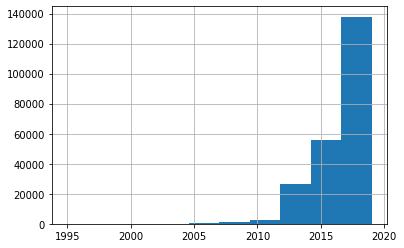

In [10]:
dates.dt.year.hist()

In [13]:
# group together anything before 2004
dates[dates < pd.Timestamp('2004-01-01')] = pd.Timestamp('2004-01-01')

/home/jeffl/Sync/lab/svnrepo/group/jeff-law/figs/igacat/2020-01-gbcb/ann-stats/num-prok-genomes-seq.pdf


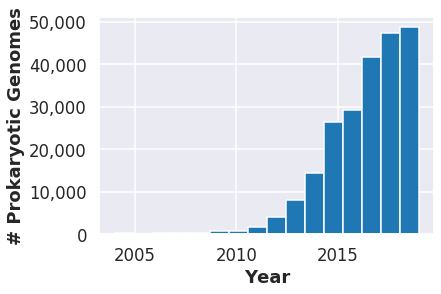

In [27]:
sns.set_context("talk")
ax = dates.dt.year.hist(bins=dates.dt.year.nunique())
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ylabel = "# Prokaryotic Genomes"
xlabel = "Year"
# ax.set_xlabel(xlabel, fontsize=axis_fontsize, weight="bold")
# ax.set_ylabel(ylabel, fontsize=axis_fontsize, weight="bold")
ax.set_xlabel(xlabel, weight="bold")
ax.set_ylabel(ylabel, weight="bold")

out_file = "/home/jeffl/Sync/lab/svnrepo/group/jeff-law/figs/igacat/2020-01-gbcb/ann-stats/num-prok-genomes-seq.pdf"
print(out_file)
plt.savefig(out_file, bbox_inches="tight")